<a href="https://colab.research.google.com/github/so50935/Image-Processing/blob/master/olist_data_analysis_and_marketing_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://vernonfernandes.net/assets/New Project.png" width="100%">

# Introduction

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

For the purpose of our analysis, we will start with merging the necessary files as there are separate tables that contain information on different aspects of the transactions. Most of these files would be essential to our analysis apart from a few which tend to cater more towards the logistics and supply chain departments.

The structure of the data schema as provided by Olist can be seen below.

<img src="https://i.imgur.com/HRhd2Y0.png" width="100%">

# Importing Libraries

In [1]:
#Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
#Plotly Libraries

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

# Business Value

The idea behind any analysis should be to provide value to the organization. Below, I've added a few tasks that could potentially add value to the ecommerce operations at Olist or be a part of a bigger solution.

The initial stages of our analysis are fairly straightforward and can be accomplished with the help of Python's several packages that make indexing, aggregation and visualization a simple task. How we apply this insight to our various Marketing pipelines might require the necessary domain knowledge. 

With the recent happenings around the world organizations are moving online faster than ever. Having an online presence not only gives your customer the convenience of being able to access your store from anywhere in the world, it gives your organization an edge with the amount of data that is being collected on a day to day basis. This allows for a highly targeted and customized approach to your marketing efforts, making sure that no penny is wasted.


# 1. Olist Orders Dataset

The **olist_orders_dataset** dataset contains the order details of all the customer purchases made. 
 
Tasks:

1. Frequency of purchases per customer.
2. Time series analysis of orders. Use of DateTime library in python to separate date and time from the necessary columns. 
3. Find out the most popular months, days and times of the day.

In [4]:
olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv')
olist_orders_dataset.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


# 2. Olist Sellers Dataset

The **olist_sellers_dataset** dataset contains the seller location. 
 
Tasks:

1. Find out the most popular cities that vendors came from.

In [5]:
olist_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')
olist_sellers_dataset.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


# 3. Olist Customers Dataset

The **olist_customers_dataset** dataset contains the geographical details of the Olist customers. 
 
Tasks:

1. Locations where most of your customers are present.

In [6]:
olist_customers_dataset = pd.read_csv('olist_customers_dataset.csv')
olist_customers_dataset.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


# 4. Olist Products Dataset

The **olist_products_dataset** dataset gives us the list of all products present on the Olist site. 
 
Tasks:

1. Not much, other than grouping by product category to find out the most popular categories by vendors.

In [93]:
# order items dataset
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [94]:
olist_products_dataset = pd.read_csv('olist_products_dataset.csv')
olist_products_dataset.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


# 5. Olist Payments Dataset

The **olist_payments_dataset** dataset contains the payment information of all orders
 
Tasks:

1. Which is the preffered method of payment.
2. How many installments do customers usually choose to pay in.
3. Is there a correlation between the installments and payment value.
4. Aggregation functions on the payment value column.

In [10]:
olist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_payments_dataset.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


# 6. Olist Geolocation Dataset

The **olist_geolocation_dataset** dataset contains the physical location where purchases were made.
 
Tasks:

1. Plot the map data usling plotly.

In [12]:
olist_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv')
olist_geolocation_dataset.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


# 7. Olist Order Reviews Dataset

The **olist_order_reviews_dataset** dataset contains review data of the orders made.
 
Tasks:

1. For now only review score can be used but NLP can be used in further use cases.

In [14]:
olist_order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv')
olist_order_reviews_dataset.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


# 8. Olist Order Items Dataset

The **olist_order_items_dataset** dataset maps the order data to the product data and seller, it also gives us the freight value and price of the product in a specific order.
 
Tasks:

1. Grouping by order_id to find out trends by price and freight value.
2. Analyzing seller data. Which sellers were better at selling which products. 
3. Is there a correlation between seller and price of products sold.

In [16]:
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
olist_order_items_dataset.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


# 9. Product Category Name Translation

The **product_category_name_translation** dataset contains translation of product category.

In [57]:
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')
product_category_name_translation.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


<img src="http://vernonfernandes.net/assets/1.png" width="100%">

Before any analysis begins, we need to merge the available CSV files. This can be a tricky part of our pipeline as mistakes can multiply down the road. 

In [58]:
df = olist_orders_dataset.merge(olist_order_reviews_dataset, on='order_id', how='left')
df = df.merge(olist_order_payments_dataset, on='order_id', how='left')
df_1 = olist_order_items_dataset.merge(olist_sellers_dataset, on='seller_id', how='left')
df_1 = df_1.merge(olist_products_dataset, on='product_id', how='left')
df = df.merge(df_1, on='order_id', how='left')
df = df.merge(olist_customers_dataset, on='customer_id', how='left')

As you can see, the dataset contains a lot of missing information, most of it however does not provide too much value to our Marketing specific analysis. 

In [59]:
df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             104962
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
seller_zip_code_prefix              833


In [60]:
df.drop(['review_comment_title','review_comment_message', 'review_creation_date','review_answer_timestamp', 'shipping_limit_date', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_approved_at'], axis=1, inplace = True)

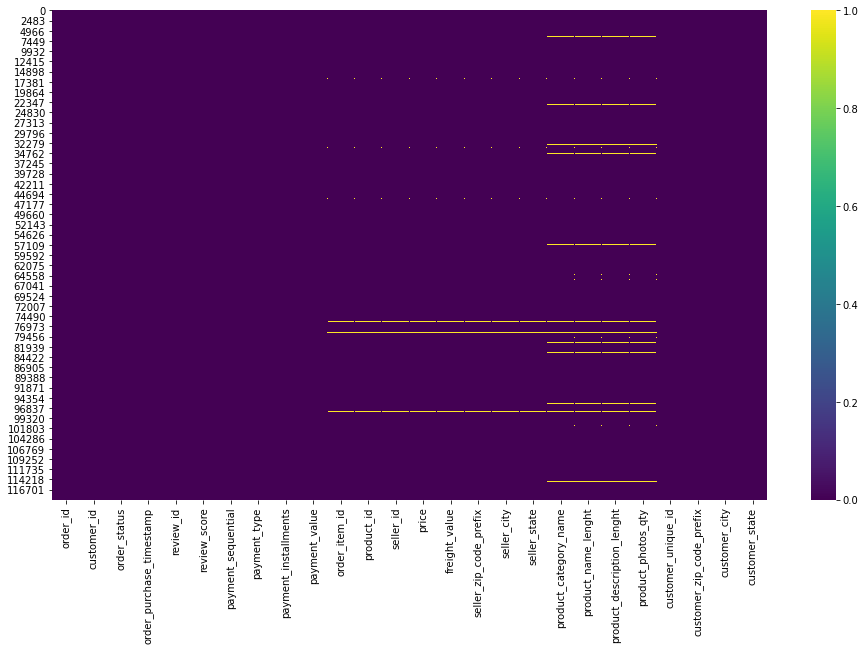

In [61]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isna(), cmap="viridis")

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
values = {'product_category_name': 0, 'product_name_lenght': 0, 'product_description_lenght': 0, 'product_photos_qty': 0}
df.fillna(value=values, inplace=True)

In [66]:
df_canc = df[df['order_status'] == 'canceled']

In [67]:
df_unavailable = df[df['order_status'] == 'unavailable']

Understandably, most of our missing information belongs to the 'unavailable' and 'cancelled' orders.

In [68]:
pd.DataFrame(df[df['order_item_id'].isna()]['order_status'].value_counts())

,order_status
unavailable,645
canceled,180
created,5
invoiced,2
shipped,1


In [69]:
df.dropna(subset=['order_item_id'], inplace=True)

In [70]:
df.dropna(subset=['payment_sequential'], inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 119150
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    118315 non-null  object 
 1   customer_id                 118315 non-null  object 
 2   order_status                118315 non-null  object 
 3   order_purchase_timestamp    118315 non-null  object 
 4   review_id                   118315 non-null  object 
 5   review_score                118315 non-null  int64  
 6   payment_sequential          118315 non-null  float64
 7   payment_type                118315 non-null  object 
 8   payment_installments        118315 non-null  float64
 9   payment_value               118315 non-null  float64
 10  order_item_id               118315 non-null  float64
 11  product_id                  118315 non-null  object 
 12  seller_id                   118315 non-null  object 
 13  price         

In [72]:
#df.to_csv('final_olist.csv', index = False, sep=',', encoding='utf-8')

<img src="http://vernonfernandes.net/assets/3.png" width="100%">

In [73]:
#1. Frequency of purchases per customer.
pd.DataFrame(df.groupby(['customer_id'])['order_id'].count().sort_values(ascending = False))

,order_id
customer_id,
270c23a11d024a44c896d1894b261a83,63
13aa59158da63ba0e93ec6ac2c07aacb,38
9af2372a1e49340278e7c1ef8d749f34,29
92cd3ec6e2d643d4ebd0e3d6238f69e2,26
d22f25a9fadfb1abbc2e29395b1239f4,24
...,...
a4a0c32813e4d6b4f6dd95dd11dc62f1,1
a4a31639efca4450f58e07417152b15e,1
a4a4bc6742b800e480f8e5f1e8cc1100,1


In [74]:
#2. Time series analysis of orders. Use of DateTime library in python to separate date and time from the necessary columns.
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [75]:
df['year_of_purchase'] = pd.DatetimeIndex(df['order_purchase_timestamp']).year
df['month_of_purchase'] = pd.DatetimeIndex(df['order_purchase_timestamp']).month
df['date_of_purchase'] = pd.DatetimeIndex(df['order_purchase_timestamp']).day
df['time_of_purchase'] = pd.DatetimeIndex(df['order_purchase_timestamp']).hour

In [76]:
monthly_orders = pd.DataFrame(df.groupby(['month_of_purchase'])['month_of_purchase'].count())

In [77]:
monthly_orders = monthly_orders.rename(index={1: 'January', 2: 'February', 3: 'March', 4: 'April', 5:'May', 6:'June', 7:'July',8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})

In [78]:
monthly_orders

,month_of_purchase
month_of_purchase,
January,9626
February,10098
March,11793
April,11137
May,12676
June,11218
July,12243
August,12688
September,5141


In [79]:
fig = go.Figure(data=go.Scatter(x=monthly_orders.index,
                                y=monthly_orders['month_of_purchase'],
                                mode='lines+markers')) # hover text goes here
fig.update_layout(title='Months With Most Orders',xaxis_title="Month",yaxis_title="Number of Orders")
fig.update_yaxes(type="log")
fig.show()

In [80]:
monthly_analysis_jan = pd.DataFrame(df[df['month_of_purchase'] == 1].groupby(['date_of_purchase'])['date_of_purchase'].count())
monthly_analysis_feb = pd.DataFrame(df[df['month_of_purchase'] == 2].groupby(['date_of_purchase'])['date_of_purchase'].count())
monthly_analysis_mar = pd.DataFrame(df[df['month_of_purchase'] == 3].groupby(['date_of_purchase'])['date_of_purchase'].count())
monthly_analysis_apr = pd.DataFrame(df[df['month_of_purchase'] == 4].groupby(['date_of_purchase'])['date_of_purchase'].count())
monthly_analysis_may = pd.DataFrame(df[df['month_of_purchase'] == 5].groupby(['date_of_purchase'])['date_of_purchase'].count())
monthly_analysis_jun = pd.DataFrame(df[df['month_of_purchase'] == 6].groupby(['date_of_purchase'])['date_of_purchase'].count())
monthly_analysis_jul = pd.DataFrame(df[df['month_of_purchase'] == 7].groupby(['date_of_purchase'])['date_of_purchase'].count())
monthly_analysis_aug = pd.DataFrame(df[df['month_of_purchase'] == 8].groupby(['date_of_purchase'])['date_of_purchase'].count())
monthly_analysis_sep = pd.DataFrame(df[df['month_of_purchase'] == 9].groupby(['date_of_purchase'])['date_of_purchase'].count())
monthly_analysis_oct = pd.DataFrame(df[df['month_of_purchase'] == 10].groupby(['date_of_purchase'])['date_of_purchase'].count())
monthly_analysis_nov = pd.DataFrame(df[df['month_of_purchase'] == 11].groupby(['date_of_purchase'])['date_of_purchase'].count())
monthly_analysis_dec = pd.DataFrame(df[df['month_of_purchase'] == 12].groupby(['date_of_purchase'])['date_of_purchase'].count())

In [81]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_analysis_jan.index, y=monthly_analysis_jan['date_of_purchase'], name ='January',
                         line=dict(color='blue', width=2)))

fig.add_trace(go.Scatter(x=monthly_analysis_feb.index, y=monthly_analysis_feb['date_of_purchase'], name ='February',
                         line=dict(color='yellow', width=2)))

fig.add_trace(go.Scatter(x=monthly_analysis_mar.index, y=monthly_analysis_mar['date_of_purchase'], name ='March',
                         line=dict(color='green', width=2)))

fig.add_trace(go.Scatter(x=monthly_analysis_apr.index, y=monthly_analysis_apr['date_of_purchase'], name ='April',
                         line=dict(color='red', width=2)))

fig.add_trace(go.Scatter(x=monthly_analysis_may.index, y=monthly_analysis_may['date_of_purchase'], name ='May',
                         line=dict(color='grey', width=2)))

fig.add_trace(go.Scatter(x=monthly_analysis_jun.index, y=monthly_analysis_jun['date_of_purchase'], name ='June',
                         line=dict(color='black', width=2)))

fig.add_trace(go.Scatter(x=monthly_analysis_jul.index, y=monthly_analysis_jul['date_of_purchase'], name ='July',
                         line=dict(color='purple', width=2)))

fig.add_trace(go.Scatter(x=monthly_analysis_aug.index, y=monthly_analysis_aug['date_of_purchase'], name ='August', 
                         line=dict(color='violet', width=2)))

fig.add_trace(go.Scatter(x=monthly_analysis_sep.index, y=monthly_analysis_sep['date_of_purchase'], name ='September', 
                         line=dict(color='royalblue', width=2)))

fig.add_trace(go.Scatter(x=monthly_analysis_oct.index, y=monthly_analysis_oct['date_of_purchase'], name ='October', 
                         line=dict(color='darkblue', width=2)))

fig.add_trace(go.Scatter(x=monthly_analysis_nov.index, y=monthly_analysis_nov['date_of_purchase'], name ='November', 
                         line=dict(color='darkred', width=2)))

fig.add_trace(go.Scatter(x=monthly_analysis_dec.index, y=monthly_analysis_dec['date_of_purchase'], name ='December', 
                         line=dict(color='darkgreen', width=2)))

fig.update_layout(title='Monthly Analysis (Double click on name in legend)',xaxis_title="Date",yaxis_title="Number of Orders")

fig.show()

In [82]:
time_purchase= df.groupby(['time_of_purchase']).agg({'time_of_purchase':'count'}).rename(columns={'time_of_purchase':'Count'})

In [83]:
fig = go.Figure(data=go.Scatter(x=time_purchase.index,
                                y=time_purchase['Count'],
                                mode='markers',
                                marker=dict(
                                size=time_purchase['Count']*0.008))) # hover text goes here
fig.update_layout(title='Purchase Times',xaxis_title="Hour",yaxis_title="Number of Orders")
fig.show()

In [84]:
popular_cities_seller = pd.DataFrame(df['seller_city'].value_counts())
popular_cities_customer = pd.DataFrame(df['customer_city'].value_counts())

In [85]:
fig = go.Figure(go.Bar(y=popular_cities_seller.head(20).index, x=popular_cities_seller['seller_city'].head(20), 
                      orientation="h"))

fig.update_layout(title_text='Top Cities For Sellers',xaxis_title="No. of Orders")
fig.update_xaxes(type="log")
fig.show()

In [86]:
fig = go.Figure(go.Bar(y=popular_cities_customer.head(20).index, x=popular_cities_customer['customer_city'].head(20), 
                      orientation="h", marker=dict(color="green")))

fig.update_layout(title_text='Top Cities For Customers',xaxis_title="No. of Orders")
fig.update_xaxes(type="log")
fig.show()

In [87]:
df.head(1).T

,0
order_id,e481f51cbdc54678b7cc49136f2d6af7
customer_id,9ef432eb6251297304e76186b10a928d
order_status,delivered
order_purchase_timestamp,2017-10-02 10:56:33
review_id,a54f0611adc9ed256b57ede6b6eb5114
review_score,4
payment_sequential,1
payment_type,credit_card
payment_installments,1
payment_value,18.12


In [46]:
#Most popular categories
popular_categories = pd.DataFrame(df.groupby(['product_category_name'])['order_id'].count().sort_values(ascending = False))

In [88]:
fig = go.Figure(go.Bar(
    x=popular_categories.head(10).index,y=popular_categories['order_id'].head(10),
    marker={'color': popular_categories['order_id'], 
    'colorscale': 'Viridis'},  
    text=popular_categories['order_id'],
    textposition = "outside",
))
fig.update_layout(title_text='Most popular categories',xaxis_title="Category Name",yaxis_title="No. of orders")
fig.show()

In [48]:
popular_cat_cities = pd.DataFrame(df.groupby(['customer_city','product_category_name'])['order_id'].count())

In [49]:
df_credit_card = df[df['payment_type'] == 'credit_card']
df_boleto = df[df['payment_type'] == 'boleto']
df_voucher = df[df['payment_type'] == 'voucher']
df_debit_card = df[df['payment_type'] == 'debit_card']

In [50]:
print('Distribution of payment menthods: \n')
print(df['payment_type'].value_counts())

Distribution of payment menthods: 

credit_card    87266
boleto         23018
voucher         6332
debit_card      1699
Name: payment_type, dtype: int64


In [51]:
print('Installment information for credit card transactions: \n')
print(df_credit_card['payment_installments'].describe())

Installment information for credit card transactions: 

count    87266.000000
mean         3.634990
std          2.939588
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         24.000000
Name: payment_installments, dtype: float64


In [52]:
print('Credit Card Payment Value\n')
print(df_credit_card['payment_value'].describe())

Credit Card Payment Value

count    87266.000000
mean       179.576475
std        267.446498
min          0.010000
25%         65.620000
50%        115.350000
75%        197.120000
max      13664.080000
Name: payment_value, dtype: float64


In [53]:
print('Boleto Payment Value\n')
print(df_boleto['payment_value'].describe())

Boleto Payment Value

count    23018.000000
mean       177.412806
std        291.578093
min         11.620000
25%         60.102500
50%        106.160000
75%        184.572500
max       7274.880000
Name: payment_value, dtype: float64


In [54]:
print('Voucher Payment Value\n')
print(df_voucher['payment_value'].describe())

Voucher Payment Value

count    6332.000000
mean       64.622344
std        92.610013
min         0.000000
25%        18.000000
50%        39.540000
75%        82.682500
max      1839.050000
Name: payment_value, dtype: float64


In [55]:
print('Debit Card Payment Value\n')
print(df_debit_card['payment_value'].describe())

Debit Card Payment Value

count    1699.000000
mean      149.788599
std       252.896762
min        13.380000
25%        53.470000
50%        97.550000
75%       172.800000
max      4445.500000
Name: payment_value, dtype: float64


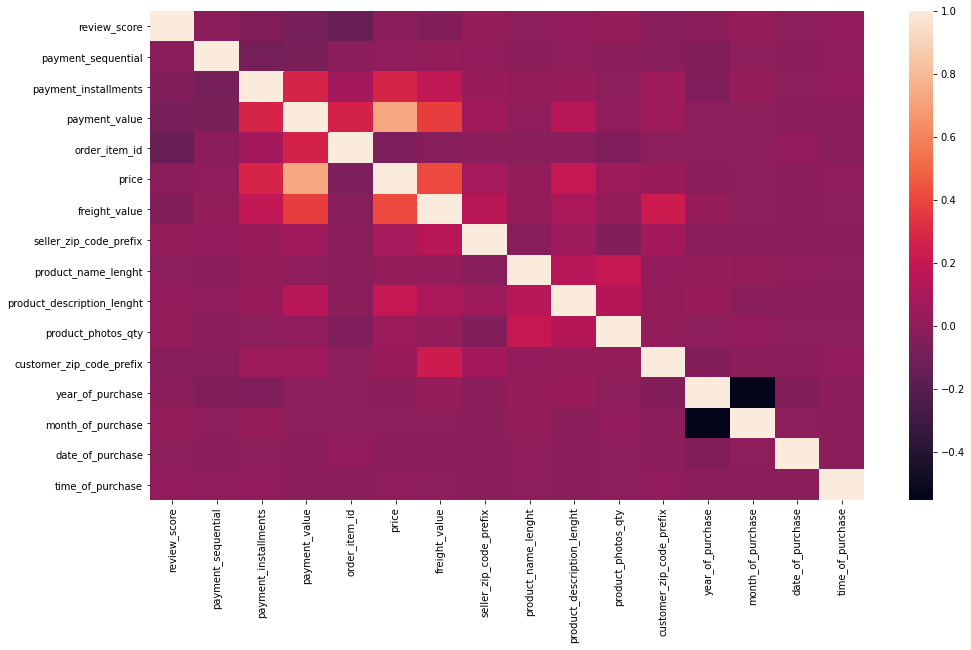

In [56]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr())